In [1]:
# Math2LaTeX: Google Colab Setup
print("🚀 Setting up Math2LaTeX in Google Colab...")

# Check if we're in Colab
try:
    import google.colab
    print("✅ Running in Google Colab")
    IN_COLAB = True
except ImportError:
    print("❌ Not in Google Colab")
    IN_COLAB = False

if IN_COLAB:
    # Check GPU availability
    import torch
    print(f"🔧 PyTorch version: {torch.__version__}")
    print(f"🎮 CUDA available: {torch.cuda.is_available()}")
    if torch.cuda.is_available():
        print(f"🎯 GPU: {torch.cuda.get_device_name(0)}")
        print(f"💾 GPU Memory: {torch.cuda.get_device_properties(0).total_memory / 1e9:.1f}GB")
    else:
        print("⚠️ No GPU detected. Go to Runtime > Change runtime type > Hardware accelerator > GPU")

# Install Unsloth for Colab (this is the easiest method)
print("\n📦 Installing Unsloth for Colab...")
!pip install "unsloth[colab-new] @ git+https://github.com/unslothai/unsloth.git"

# Install additional dependencies
print("\n📦 Installing additional dependencies...")
!pip install datasets gradio

print("\n✅ Installation complete!")

# Test imports
print("\n🧪 Testing imports...")
try:
    from unsloth import FastVisionModel
    import torch
    print("✅ Unsloth imported successfully")

    # Available models for Colab
    print("\n📋 Available models for Colab:")
    fourbit_models = [
        "unsloth/Llama-3.2-11B-Vision-Instruct-bnb-4bit",
        "unsloth/Qwen2-VL-7B-Instruct-bnb-4bit"
    ]

    for i, model_name in enumerate(fourbit_models, 1):
        print(f"   {i}. {model_name}")

    print("\n🎯 Ready to load model!")

except ImportError as e:
    print(f"❌ Import error: {e}")
    print("🔄 Try restarting runtime: Runtime > Restart runtime")

print("\n" + "="*60)
print("📝 COLAB TIPS:")
print("="*60)
print("• Make sure you're using GPU runtime (Runtime > Change runtime type)")
print("• If imports fail, restart runtime and run this cell again")
print("• Colab sessions timeout after ~12 hours")
print("• Save your work to Google Drive regularly")
print("="*60)

🚀 Setting up Math2LaTeX in Google Colab...
✅ Running in Google Colab
🔧 PyTorch version: 2.8.0+cu126
🎮 CUDA available: True
🎯 GPU: NVIDIA A100-SXM4-40GB
💾 GPU Memory: 42.5GB

📦 Installing Unsloth for Colab...
  Cloning https://github.com/unslothai/unsloth.git to /tmp/pip-install-ebx76oct/unsloth_c725b2824f004c6b9da883605cf2999d
  Running command git clone --filter=blob:none --quiet https://github.com/unslothai/unsloth.git /tmp/pip-install-ebx76oct/unsloth_c725b2824f004c6b9da883605cf2999d
  Resolved https://github.com/unslothai/unsloth.git to commit 26601f9d42b4c416efa59a062665c858b94c8673
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.3/61.3 MB 41.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.5/491.5 kB 14.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.8/184.8 kB 18.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
!pip install --no-deps bitsandbytes accelerate xformers==0.0.29.post3 peft trl triton cut_cross_entropy unsloth_zoo
!pip install sentencepiece protobuf datasets huggingface_hub hf_transfer
!pip install --no-deps unsloth

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.4/43.4 MB 55.2 MB/s eta 0:00:00


In [4]:
from unsloth import FastVisionModel
import torch

In [5]:
fourbit_models = [
    "unsloth/Llama-3.2-11B-Vision-Instruct-bnb-4bit",
    "unsloth/Qwen2-VL-7B-Instruct-bnb-4bit"
]

In [6]:
model, tokenizer = FastVisionModel.from_pretrained(
    "unsloth/Qwen2-VL-7B-Instruct",
    load_in_4bit=True,
    use_gradient_checkpointing="unsloth"
)

==((====))==  Unsloth 2025.8.9: Fast Qwen2 patching. Transformers: 4.55.2.
   \\   /|    NVIDIA A100-SXM4-40GB. Num GPUs = 1. Max memory: 39.557 GB. Platform: Linux.
O^O/ \_/ \    Torch: 2.8.0+cu126. CUDA: 8.0. CUDA Toolkit: 12.6. Triton: 3.4.0
\        /    Bfloat16 = TRUE. FA [Xformers = None. FA2 = False]
 "-____-"     Free license: http://github.com/unslothai/unsloth
Unsloth: Fast downloading is enabled - ignore downloading bars which are red colored!


model.safetensors:   0%|          | 0.00/6.85G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/238 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/572 [00:00<?, ?B/s]

The image processor of type `Qwen2VLImageProcessor` is now loaded as a fast processor by default, even if the model checkpoint was saved with a slow processor. This is a breaking change and may produce slightly different outputs. To continue using the slow processor, instantiate this class with `use_fast=False`. Note that this behavior will be extended to all models in a future release.


tokenizer_config.json: 0.00B [00:00, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json:   0%|          | 0.00/11.4M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/392 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/614 [00:00<?, ?B/s]

You have video processor config saved in `preprocessor.json` file which is deprecated. Video processor configs should be saved in their own `video_preprocessor.json` file. You can rename the file or load and save the processor back which renames it automatically. Loading from `preprocessor.json` will be removed in v5.0.


chat_template.json: 0.00B [00:00, ?B/s]

In [7]:
model = FastVisionModel.get_peft_model(
    model,
    finetune_vision_layers=True,
    finetune_language_layers=True,
    finetune_attention_modules=True,
    finetune_mlp_modules=True,

    r=16,
    lora_alpha=16,
    lora_dropout=0,
    bias="none",
    random_state = 3407,
    use_rslora=False,
    loftq_config=None
)

In [8]:
from datasets import load_dataset
dataset = load_dataset("unsloth/Latex_OCR", split="train")

README.md:   0%|          | 0.00/519 [00:00<?, ?B/s]

data/train-00000-of-00001.parquet:   0%|          | 0.00/344M [00:00<?, ?B/s]

data/test-00000-of-00001.parquet:   0%|          | 0.00/38.2M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/68686 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/7632 [00:00<?, ? examples/s]

In [9]:
dataset

Dataset({
    features: ['image', 'text'],
    num_rows: 68686
})

In [10]:
dataset[0]

{'image': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=160x40>,
 'text': '{ \\frac { N } { M } } \\in { \\bf Z } , { \\frac { M } { P } } \\in { \\bf Z } , { \\frac { P } { Q } } \\in { \\bf Z }'}

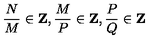

In [11]:
dataset[0]["image"]

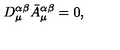

In [12]:
dataset[1]["image"]

In [13]:
dataset[1]["text"]

'D _ { \\mu } ^ { \\alpha \\beta } \\bar { A } _ { \\mu } ^ { \\alpha \\beta } = 0 ,'

In [14]:
instruction = "Write the LaTex representation for this image."

In [16]:
def convert_to_conversation(sample):
  conversation = [
      {"role": "user",
       "content": [
           {"type": "text", "text": instruction},
           {"type": "image", "image": sample["image"]}
       ]
       },
      {"role": "assistant",
       "content": [
           {"type": "text", "text": sample["text"]}
       ]
       }
  ]
  return {"messages": conversation}


In [17]:
convert_to_conversation(dataset[0])

{'messages': [{'role': 'user',
   'content': [{'type': 'text',
     'text': 'Write the LaTex representation for this image.'},
    {'type': 'image',
     'image': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=160x40>}]},
  {'role': 'assistant',
   'content': [{'type': 'text',
     'text': '{ \\frac { N } { M } } \\in { \\bf Z } , { \\frac { M } { P } } \\in { \\bf Z } , { \\frac { P } { Q } } \\in { \\bf Z }'}]}]}

In [18]:
converted_dataset = [convert_to_conversation(sample) for sample in dataset]

In [19]:
converted_dataset[1]

{'messages': [{'role': 'user',
   'content': [{'type': 'text',
     'text': 'Write the LaTex representation for this image.'},
    {'type': 'image',
     'image': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=120x50>}]},
  {'role': 'assistant',
   'content': [{'type': 'text',
     'text': 'D _ { \\mu } ^ { \\alpha \\beta } \\bar { A } _ { \\mu } ^ { \\alpha \\beta } = 0 ,'}]}]}

In [20]:
FastVisionModel.for_inference(model)

PeftModel(
  (base_model): LoraModel(
    (model): Qwen2VLForConditionalGeneration(
      (model): Qwen2VLModel(
        (visual): Qwen2VisionTransformerPretrainedModel(
          (patch_embed): PatchEmbed(
            (proj): Conv3d(3, 1280, kernel_size=(2, 14, 14), stride=(2, 14, 14), bias=False)
          )
          (rotary_pos_emb): VisionRotaryEmbedding()
          (blocks): ModuleList(
            (0-18): 19 x Qwen2VLVisionBlock(
              (norm1): LayerNorm((1280,), eps=1e-06, elementwise_affine=True)
              (norm2): LayerNorm((1280,), eps=1e-06, elementwise_affine=True)
              (attn): VisionAttention(
                (qkv): lora.Linear(
                  (base_layer): Linear(in_features=1280, out_features=3840, bias=True)
                  (lora_dropout): ModuleDict(
                    (default): Identity()
                  )
                  (lora_A): ModuleDict(
                    (default): Linear(in_features=1280, out_features=16, bias=False)
        

In [21]:
image = dataset[1]["image"]
messages = [
    {
        "role": "user",
        "content": [
            {"type": "text", "text": instruction},
            {"type": "image", "image": image}
        ]
    }
]

In [22]:
input_text = tokenizer.apply_chat_template(messages, add_generation_prompt=True)
inputs = tokenizer(
    image, input_text,
    add_special_tokens = False,
    return_tensors = "pt",
).to("cuda")

In [23]:
from transformers import TextStreamer
text_streamer = TextStreamer(tokenizer, skip_prompt=True)
_ = model.generate(**inputs, streamer= text_streamer, max_new_tokens = 128, use_cache=True, temperature=1.5, min_p=0.1)

The LaTeX representation for the image is:

```latex
D_{\mu} \tilde{A}_{\mu}^{\beta} = 0,
```<|im_end|>


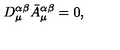

In [24]:
image

In [26]:
from unsloth import is_bf16_supported
from unsloth.trainer import UnslothVisionDataCollator
from trl import SFTTrainer, SFTConfig

In [27]:
FastVisionModel.for_inference(model)

PeftModel(
  (base_model): LoraModel(
    (model): Qwen2VLForConditionalGeneration(
      (model): Qwen2VLModel(
        (visual): Qwen2VisionTransformerPretrainedModel(
          (patch_embed): PatchEmbed(
            (proj): Conv3d(3, 1280, kernel_size=(2, 14, 14), stride=(2, 14, 14), bias=False)
          )
          (rotary_pos_emb): VisionRotaryEmbedding()
          (blocks): ModuleList(
            (0-18): 19 x Qwen2VLVisionBlock(
              (norm1): LayerNorm((1280,), eps=1e-06, elementwise_affine=True)
              (norm2): LayerNorm((1280,), eps=1e-06, elementwise_affine=True)
              (attn): VisionAttention(
                (qkv): lora.Linear(
                  (base_layer): Linear(in_features=1280, out_features=3840, bias=True)
                  (lora_dropout): ModuleDict(
                    (default): Identity()
                  )
                  (lora_A): ModuleDict(
                    (default): Linear(in_features=1280, out_features=16, bias=False)
        

In [28]:
trainer = SFTTrainer(
    model = model,
    tokenizer=tokenizer,
    data_collator = UnslothVisionDataCollator(model, tokenizer),
    train_dataset = converted_dataset,
    args = SFTConfig(
        per_device_train_batch_size=2,
        gradient_accumulation_steps=4,
        warmup_steps = 5,
        max_steps=30,
        learning_rate=2e-4,
        fp16=not is_bf16_supported(),
        bf16 = is_bf16_supported(),
        logging_steps=1,
        optim="adamw_8bit",
        weight_decay=0.01,
        lr_scheduler_type="linear",
        seed=3407,
        output_dir="outputs",
        report_to = "none",
        remove_unused_columns=False,
        dataset_text_field="",
        dataset_kwargs = {"skip_prepare_dataset": True},
        dataset_num_proc=4,
        max_seq_length=2048,
    ),
)

Unsloth: Model does not have a default image size - using 512


In [29]:
trainer.train()

==((====))==  Unsloth - 2x faster free finetuning | Num GPUs used = 1
   \\   /|    Num examples = 68,686 | Num Epochs = 1 | Total steps = 30
O^O/ \_/ \    Batch size per device = 2 | Gradient accumulation steps = 4
\        /    Data Parallel GPUs = 1 | Total batch size (2 x 4 x 1) = 8
 "-____-"     Trainable parameters = 50,855,936 of 8,342,231,552 (0.61% trained)


Unsloth: Will smartly offload gradients to save VRAM!


Step,Training Loss
1,1.179700
2,1.327600
3,1.417500
4,1.007800
5,0.944200
6,0.931300
7,0.737200
8,0.500500
9,0.335000
10,0.379600


TrainOutput(global_step=30, training_loss=0.40656433229645095, metrics={'train_runtime': 105.6466, 'train_samples_per_second': 2.272, 'train_steps_per_second': 0.284, 'total_flos': 1673161698422784.0, 'train_loss': 0.40656433229645095})

In [30]:
FastVisionModel.for_inference(model)

PeftModel(
  (base_model): LoraModel(
    (model): Qwen2VLForConditionalGeneration(
      (model): Qwen2VLModel(
        (visual): Qwen2VisionTransformerPretrainedModel(
          (patch_embed): PatchEmbed(
            (proj): Conv3d(3, 1280, kernel_size=(2, 14, 14), stride=(2, 14, 14), bias=False)
          )
          (rotary_pos_emb): VisionRotaryEmbedding()
          (blocks): ModuleList(
            (0-18): 19 x Qwen2VLVisionBlock(
              (norm1): LayerNorm((1280,), eps=1e-06, elementwise_affine=True)
              (norm2): LayerNorm((1280,), eps=1e-06, elementwise_affine=True)
              (attn): VisionAttention(
                (qkv): lora.Linear(
                  (base_layer): Linear(in_features=1280, out_features=3840, bias=True)
                  (lora_dropout): ModuleDict(
                    (default): Identity()
                  )
                  (lora_A): ModuleDict(
                    (default): Linear(in_features=1280, out_features=16, bias=False)
        

In [31]:
image = dataset[2]["image"]

In [32]:
instruction = "Write the LaTeX representation for this image."

In [33]:
messages = [
    {"role": "user", "content": [
        {"type": "image"},
        {"type": "text", "text": instruction}
    ]}
]

In [34]:
input_text = tokenizer.apply_chat_template(messages, add_generation_prompt=True)
inputs = tokenizer(
    image,
    input_text,
    add_special_tokens=False,
    return_tensors="pt",
).to("cuda")

In [35]:
from transformers import TextStreamer
text_streamer = TextStreamer(tokenizer, skip_prompt=True)

_ = model.generate(**inputs, streamer=text_streamer, max_new_tokens=128, use_cache=True, temperature=1.5, min_p=0.1)

H ^ { \prime } = \beta N \int d \lambda \left\{ \frac { 1 } { 2 \beta ^ { 2 } N ^ { 2 } } \partial _ { \lambda } \xi ^ { \dagger } \partial _ { \lambda } \xi + V ( \lambda ) \xi ^ { \dagger } \xi \right\} \ .<|im_end|>


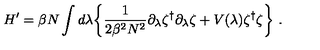

In [36]:
image

In [39]:
# Math2LaTeX Gradio Web App
import gradio as gr
import torch
from PIL import Image
import io
import base64

print("🚀 Creating Math2LaTeX Gradio App...")

# Make sure model is in inference mode
FastVisionModel.for_inference(model)

def predict_latex(image):
    """
    Convert uploaded image to LaTeX code

    Args:
        image: PIL Image uploaded by user

    Returns:
        tuple: (latex_code, rendered_preview, confidence_message)
    """
    try:
        # Prepare the instruction
        instruction = "Write the LaTeX representation for this image."

        # Format the message for the model
        messages = [
            {
                "role": "user",
                "content": [
                    {"type": "text", "text": instruction},
                    {"type": "image", "image": image}
                ]
            }
        ]

        # Tokenize the input
        input_text = tokenizer.apply_chat_template(messages, add_generation_prompt=True)
        inputs = tokenizer(
            image,
            input_text,
            add_special_tokens=False,
            return_tensors="pt",
        ).to("cuda")

        # Generate LaTeX code
        with torch.no_grad():
            outputs = model.generate(
                **inputs,
                max_new_tokens=256,  # Increased for longer equations
                use_cache=True,
                temperature=0.7,     # Lower temperature for more consistent output
                min_p=0.1,
                do_sample=True,
                pad_token_id=tokenizer.eos_token_id
            )

        # Decode the output
        generated_text = tokenizer.decode(outputs[0], skip_special_tokens=True)

        # Extract just the LaTeX part (after the assistant's response starts)
        latex_start = generated_text.find("assistant") + len("assistant")
        latex_code = generated_text[latex_start:].strip()

        # Clean up the LaTeX code
        latex_code = latex_code.replace("</s>", "").strip()

        # Create a simple LaTeX preview (you can enhance this)
        preview_html = f"""
        <div style='background: #f5f5f5; padding: 15px; border-radius: 8px; margin: 10px 0;'>
            <h4>LaTeX Preview:</h4>
            <code style='background: white; padding: 10px; display: block; border-radius: 4px;'>
                {latex_code}
            </code>
        </div>
        """

        confidence_msg = "✅ LaTeX generated successfully! Copy the code below."

        return latex_code, preview_html, confidence_msg

    except Exception as e:
        error_msg = f"❌ Error generating LaTeX: {str(e)}"
        return "", "<div style='color: red;'>Error occurred during processing</div>", error_msg

def copy_to_clipboard_js():
    """JavaScript function to copy LaTeX to clipboard"""
    return """
    function copyToClipboard(text) {
        navigator.clipboard.writeText(text).then(function() {
            alert('LaTeX code copied to clipboard!');
        });
    }
    """

# Create the Gradio interface
with gr.Blocks(
    title="Math2LaTeX: Equation OCR with Qwen2-VL",
    theme=gr.themes.Soft(),
    css="""
    .gradio-container {max-width: 800px; margin: auto;}
    .output-latex {font-family: 'Courier New', monospace; background: #f8f9fa; padding: 10px; border-radius: 5px;}
    """
) as demo:

    # Header
    gr.Markdown("""
    # 🔢→📝 Math2LaTeX: Equation OCR with Qwen2-VL

    Upload an image containing mathematical equations and get the LaTeX representation!

    **Features:**
    - Fine-tuned Qwen2-VL model for math OCR
    - Real-time LaTeX generation
    - Copy to clipboard functionality
    """)

    with gr.Row():
        with gr.Column(scale=1):
            # Input section
            gr.Markdown("### 📤 Upload Image")
            image_input = gr.Image(
                type="pil",
                label="Upload Math Equation Image",
                height=300
            )

            generate_btn = gr.Button(
                "🚀 Generate LaTeX",
                variant="primary",
                size="lg"
            )

        with gr.Column(scale=1):
            # Output section
            gr.Markdown("### 📝 Generated LaTeX")

            status_output = gr.Markdown("Upload an image to get started!")

            latex_output = gr.Textbox(
                label="LaTeX Code",
                placeholder="Generated LaTeX will appear here...",
                lines=6,
                elem_classes=["output-latex"]
            )

            preview_output = gr.HTML(label="Preview")

            # Action buttons
            with gr.Row():
                copy_btn = gr.Button("📋 Copy to Clipboard", size="sm")
                download_btn = gr.Button("💾 Download .tex", size="sm")

    # Sample images section
    gr.Markdown("### 📋 Try Sample Images")
    with gr.Row():
        # Create clickable buttons instead of non-interactive images
        for i in range(min(3, len(dataset))):
            with gr.Column():
                gr.Image(
                    value=dataset[i]["image"],
                    label=f"Sample {i+1}",
                    height=150,
                    interactive=False
                )
                sample_btn = gr.Button(f"Use Sample {i+1}", size="sm")
                sample_btn.click(
                    fn=lambda idx=i: dataset[idx]["image"],
                    outputs=image_input
                )

    # Main generation function
    generate_btn.click(
        fn=predict_latex,
        inputs=image_input,
        outputs=[latex_output, preview_output, status_output]
    )

    # Download function
    def create_tex_file(latex_code):
        if latex_code.strip():
            tex_content = f"""\\documentclass{{article}}
\\usepackage{{amsmath}}
\\usepackage{{amssymb}}
\\begin{{document}}

{latex_code}

\\end{{document}}"""
            return tex_content
        return ""

    download_btn.click(
        fn=create_tex_file,
        inputs=latex_output,
        outputs=gr.File(label="Download LaTeX file")
    )

    # Footer
    gr.Markdown("""
    ---
    **Math2LaTeX** - Built with Qwen2-VL, LoRA fine-tuning, and Gradio

    *Tip: For best results, use clear images with well-defined mathematical notation*
    """)

# Launch the app
print("🌟 Launching Math2LaTeX Web App...")
demo.launch(
    share=True,  # Creates public link for sharing
    debug=True,  # Enable debug mode
    height=800
)

print("✅ App launched successfully!")
print("🔗 Use the public link to share your app with others!")

🚀 Creating Math2LaTeX Gradio App...
🌟 Launching Math2LaTeX Web App...
Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://9deb9317283726713f.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://9deb9317283726713f.gradio.live
✅ App launched successfully!
🔗 Use the public link to share your app with others!
